In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

In [2]:
headway_df = pd.read_csv('..\Data\headway_data_with_datetimes.csv')

In [3]:
headway_df.iloc[0:30,0:20]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY
0,120230801,1,99457890,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN
1,120230801,1,99457891,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN
2,120230801,1,99457892,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN
3,120230801,1,99457893,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN
4,120230801,1,99457894,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN
5,120230801,1,99457895,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN
6,120230801,1,99457896,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN
7,120230801,1,99457897,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0
8,120230801,1,99457898,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0
9,120230801,1,99457899,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0


In [4]:
headway_df.iloc[0:30,20:]

,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS
0,NaN,NaN,0,0,1,0,0.0,0,2,6.500000,2023-08-01 - 345104,22,ON TIME
1,NaN,NaN,0,0,1,0,0.0,0,9,0.000000,2023-08-01 - 345104,22,ON TIME
2,NaN,NaN,0,0,1,0,0.0,0,19,0.000000,2023-08-01 - 345104,22,ON TIME
3,NaN,NaN,0,0,1,0,NaN,0,35,0.000000,2023-08-01 - 345104,22,ON TIME
4,NaN,NaN,0,0,1,0,0.0,0,36,12.866666,2023-08-01 - 345105,22,ON TIME
5,NaN,NaN,0,0,1,0,0.0,0,51,0.000000,2023-08-01 - 345105,22,ON TIME
6,NaN,NaN,0,0,1,0,NaN,0,62,0.000000,2023-08-01 - 345105,22,ON TIME
7,37.666666,2.666666,0,0,1,0,0.0,0,63,13.216666,2023-08-01 - 345106,22,ON TIME
8,36.966666,1.966666,0,0,1,0,0.0,0,70,0.000000,2023-08-01 - 345106,22,ON TIME
9,14.516666,-0.483334,0,0,1,0,0.0,0,80,0.000000,2023-08-01 - 345106,22,ON TIME


In [5]:
trip_id_list = headway_df['TRIP_ID']
trip_id_list_unique = trip_id_list.unique()
len(trip_id_list_unique)

3987

In [6]:
calendar_id_list = headway_df['CALENDAR_ID']
calendar_id_list_unique = calendar_id_list.unique()
print(calendar_id_list_unique)

[120230801 120230802 120230803 120230804 120230805 120230806 120230807
 120230808 120230809 120230810 120230811 120230812 120230813 120230814
 120230815 120230816 120230817 120230818 120230819 120230820 120230821
 120230822 120230823 120230824 120230825 120230826 120230827 120230828
 120230829 120230830 120230831 120230901 120230902 120230903 120230904
 120230905 120230906 120230907 120230908 120230909 120230910 120230911
 120230912 120230913 120230914 120230915 120230916 120230917 120230918
 120230919 120230920 120230921 120230922 120230923 120230924 120230925
 120230926 120230927 120230928 120230929 120230930]


In [7]:
headway_df['SCHEDULED_TIME']=pd.to_datetime(headway_df['SCHEDULED_TIME'])

In [8]:
headway_df['ACTUAL_ARRIVAL_TIME']=pd.to_datetime(headway_df['ACTUAL_ARRIVAL_TIME'])

In [9]:
headway_df['ACTUAL_DEPARTURE_TIME']=pd.to_datetime(headway_df['ACTUAL_DEPARTURE_TIME'])

In [10]:
#headway_df['DATE']=pd.to_datetime(headway_df['DATE']).dt.date

In [11]:
#Old loop for sequence order and datetimes using headway_data_with_routes.csv

# start_time = time.time()
# headway_df_adj = pd.DataFrame(None)
# for day in calendar_id_list_unique:    
#     sched_start_dict = {}
#     actual_start_dict = {}
#     headway_df_day = headway_df[headway_df['CALENDAR_ID']==day].copy()
#     headway_df_day = headway_df_day.reset_index(drop=True)
#     for i in range(len(headway_df_day)):
#         if headway_df_day.loc[i,'TRIP_EDGE'] == 1:
#             headway_df_day.loc[i,'ROUTE_START_SEQ'] = headway_df_day.loc[i,'ROUTE_STOP_SEQUENCE']
#             try:
#                 sched_start_dict.update({headway_df_day.loc[i,'TRIP_ID']:datetime.combine(headway_df_day.loc[i,'DATE'],headway_df_day.loc[i,'SCHEDULED_TIME'])})
#             except:
#                 pass
            
#             try:
#                 actual_start_dict.update({headway_df.loc[i,'TRIP_ID']:datetime.combine(headway_df_day.loc[i,'DATE'],headway_df_day.loc[i,'ACTUAL_DEPARTURE_TIME'])})
#             except:
#                 pass        
#         else:
#             headway_df_day.loc[i,'ROUTE_START_SEQ'] = np.nan
    
#     #Scheduled time now datetime
#     for i in range(len(headway_df_day)):
#         try:
#             headway_df_day.loc[i,'SCHEDULED_TIME'] = datetime.combine(headway_df_day.loc[i,'DATE'],headway_df_day.loc[i,'SCHEDULED_TIME'])
#         except:
#             pass
        
#     #Actual Arrival Time now datetime
#     for i in range(len(headway_df_day)):
#         try:
#             headway_df_day.loc[i,'ACTUAL_ARRIVAL_TIME'] = datetime.combine(headway_df_day.loc[i,'DATE'],headway_df_day.loc[i,'ACTUAL_ARRIVAL_TIME'])
#         except:
#             pass
  
#     #Actual Departure Time now datetime
#     for i in range(len(headway_df_day)):
#         try:
#             headway_df_day.loc[i,'ACTUAL_DEPARTURE_TIME'] = datetime.combine(headway_df_day.loc[i,'DATE'],headway_df_day.loc[i,'ACTUAL_DEPARTURE_TIME'])
#         except:
#             pass

#     #Scheduled Trip Start Time
#     for i in range(len(headway_df_day)):
#         try:
#             headway_df_day.loc[i,'ROUTE_SCHED_START'] = sched_start_dict[headway_df_day.loc[i,'TRIP_ID']]
#         except:
#             pass
    
#     #Actual Trip Start Time
#     for i in range(len(headway_df_day)):
#         try:
#             headway_df_day.loc[i,'ROUTE_ACTUAL_START'] = actual_start_dict[headway_df_day.loc[i,'TRIP_ID']]
#         except:
#             pass
    
#     #Sequence adjustment
#     route_start_df = headway_df_day.groupby('TRIP_ID',as_index=False)['ROUTE_START_SEQ'].max()   
#     route_start_dict = dict(zip(route_start_df['TRIP_ID'], route_start_df['ROUTE_START_SEQ']))
#     for i in range(len(headway_df_day)):
#         headway_df_day.loc[i,'ROUTE_START_SEQ'] = route_start_dict[headway_df_day.loc[i,'TRIP_ID']]
    
#     if headway_df_adj.empty:
#         headway_df_adj = headway_df_day.copy()
#     else:
#         headway_df_adj = pd.concat([headway_df_adj,headway_df_day], ignore_index=True)
    
#     print(f'{day} day is done compiling.')

# print(f"Complete! Compliling the full adjusted time and sequence dataframe took: {time.time()-start_time:.2f} seconds")
# headway_df_adj.iloc[0:10,30:]

In [12]:
start_time = time.time()
headway_df_adj = pd.DataFrame(None)
for day in calendar_id_list_unique:    
    sched_start_dict = {}
    actual_start_dict = {}
    headway_df_day = headway_df[headway_df['CALENDAR_ID']==day].copy()
    headway_df_day = headway_df_day.reset_index(drop=True)
    for i in range(len(headway_df_day)):
        if headway_df_day.loc[i,'TRIP_EDGE'] == 1:
            headway_df_day.loc[i,'ROUTE_START_SEQ'] = headway_df_day.loc[i,'ROUTE_STOP_SEQUENCE']
            try:
                sched_start_dict.update({headway_df_day.loc[i,'TRIP_ID']:headway_df_day.loc[i,'SCHEDULED_TIME']})
            except:
                pass
            
            try:
                actual_start_dict.update({headway_df.loc[i,'TRIP_ID']:headway_df_day.loc[i,'ACTUAL_DEPARTURE_TIME']})
            except:
                pass        
        else:
            headway_df_day.loc[i,'ROUTE_START_SEQ'] = np.nan
        

    #Scheduled Trip Start Time
    for i in range(len(headway_df_day)):
        try:
            headway_df_day.loc[i,'ROUTE_SCHED_START'] = sched_start_dict[headway_df_day.loc[i,'TRIP_ID']]
        except:
            pass
    
    #Actual Trip Start Time
    for i in range(len(headway_df_day)):
        try:
            headway_df_day.loc[i,'ROUTE_ACTUAL_START'] = actual_start_dict[headway_df_day.loc[i,'TRIP_ID']]
        except:
            pass
    
    #Sequence adjustment
    route_start_df = headway_df_day.groupby('TRIP_ID',as_index=False)['ROUTE_START_SEQ'].max()   
    route_start_dict = dict(zip(route_start_df['TRIP_ID'], route_start_df['ROUTE_START_SEQ']))
    for i in range(len(headway_df_day)):
        headway_df_day.loc[i,'ROUTE_START_SEQ'] = route_start_dict[headway_df_day.loc[i,'TRIP_ID']]
    
    if headway_df_adj.empty:
        headway_df_adj = headway_df_day.copy()
    else:
        headway_df_adj = pd.concat([headway_df_adj,headway_df_day], ignore_index=True)
    
    print(f'{day} day is done compiling.')

print(f"Complete! Compliling the full adjusted time and sequence dataframe took: {time.time()-start_time:.2f} seconds")
headway_df_adj.iloc[0:10,30:]

120230801 day is done compiling.
120230802 day is done compiling.
120230803 day is done compiling.
120230804 day is done compiling.
120230805 day is done compiling.
120230806 day is done compiling.
120230807 day is done compiling.
120230808 day is done compiling.
120230809 day is done compiling.
120230810 day is done compiling.
120230811 day is done compiling.
120230812 day is done compiling.
120230813 day is done compiling.
120230814 day is done compiling.
120230815 day is done compiling.
120230816 day is done compiling.
120230817 day is done compiling.
120230818 day is done compiling.
120230819 day is done compiling.
120230820 day is done compiling.
120230821 day is done compiling.
120230822 day is done compiling.
120230823 day is done compiling.
120230824 day is done compiling.
120230825 day is done compiling.
120230826 day is done compiling.
120230827 day is done compiling.
120230828 day is done compiling.
120230829 day is done compiling.
120230830 day is done compiling.
120230831 

,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START
0,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08
1,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08
2,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08
3,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08
4,2023-08-01 - 345105,22,ON TIME,1.0,2023-08-01 05:15:00,2023-08-01 05:16:35
5,2023-08-01 - 345105,22,ON TIME,1.0,2023-08-01 05:15:00,2023-08-01 05:16:35
6,2023-08-01 - 345105,22,ON TIME,1.0,2023-08-01 05:15:00,2023-08-01 05:16:35
7,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43
8,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43
9,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43


In [13]:
#Trying to refactor code with itertuples(). Need to adjust loops to not create new columns since tuples now.
#Could I also just refactor with np.where()?

# start_time = time.time()
# headway_df_adj = pd.DataFrame(None)
# for day in calendar_id_list_unique:    
#     sched_start_dict = {}
#     actual_start_dict = {}
#     headway_df_day = headway_df[headway_df['CALENDAR_ID']==day].copy()
#     headway_df_day = headway_df_day.reset_index(drop=True)
#     for row in headway_df_day.itertuples():
#         if row.TRIP_EDGE == 1:
#             row.ROUTE_START_SEQ = row.ROUTE_STOP_SEQUENCE
#             try:
#                 sched_start_dict.update({row.TRIP_ID:row.SCHEDULED_TIME})
#             except:
#                 pass
            
#             try:
#                 actual_start_dict.update({row.TRIP_ID:row.ACTUAL_DEPARTURE_TIME})
#             except:
#                 pass        
#         else:
#             row.ROUTE_START_SEQ = np.nan
        

#     #Scheduled Trip Start Time
#     for row in headway_df_day.itertuples():
#         try:
#             row.ROUTE_SCHED_START = sched_start_dict[row.TRIP_ID]
#         except:
#             pass
    
#     #Actual Trip Start Time
#     for row in headway_df_day.itertuples():
#         try:
#             row.ROUTE_ACTUAL_START = actual_start_dict[row.TRIP_ID]
#         except:
#             pass
    
#     #Sequence adjustment
#     route_start_df = headway_df_day.groupby('TRIP_ID',as_index=False)['ROUTE_START_SEQ'].max()   
#     route_start_dict = dict(zip(route_start_df['TRIP_ID'], route_start_df['ROUTE_START_SEQ']))
#     for row in headway_df_day.itertuples():
#         row.ROUTE_START_SEQ = route_start_dict[row.TRIP_ID]
    
#     if headway_df_adj.empty:
#         headway_df_adj = headway_df_day.copy()
#     else:
#         headway_df_adj = pd.concat([headway_df_adj,headway_df_day], ignore_index=True)
    
#     print(f'{day} day is done compiling.')

# print(f"Complete! Compliling the full adjusted time and sequence dataframe took: {time.time()-start_time:.2f} seconds")
# headway_df_adj.iloc[0:10,30:]

In [14]:
headway_df_adj['STOP_SEQ_ADJ'] = abs(headway_df_adj['ROUTE_START_SEQ']-headway_df_adj['ROUTE_STOP_SEQUENCE'])+1
headway_df_adj.iloc[0:10,30:]

,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START,STOP_SEQ_ADJ
0,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08,1.0
1,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08,5.0
2,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08,10.0
3,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08,14.0
4,2023-08-01 - 345105,22,ON TIME,1.0,2023-08-01 05:15:00,2023-08-01 05:16:35,1.0
5,2023-08-01 - 345105,22,ON TIME,1.0,2023-08-01 05:15:00,2023-08-01 05:16:35,5.0
6,2023-08-01 - 345105,22,ON TIME,1.0,2023-08-01 05:15:00,2023-08-01 05:16:35,14.0
7,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43,1.0
8,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43,5.0
9,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43,10.0


In [15]:
headway_df_adj[headway_df_adj['CALENDAR_ID']==120230808]['SCHEDULED_TIME'].dropna().sort_values()

40905   2023-08-08 04:20:00
44033   2023-08-08 04:23:00
40906   2023-08-08 04:29:00
44034   2023-08-08 04:30:00
45175   2023-08-08 04:30:00
                ...        
45052   2023-08-09 00:57:00
41578   2023-08-09 00:57:00
43264   2023-08-09 00:57:00
43265   2023-08-09 01:02:00
41579   2023-08-09 01:05:00
Name: SCHEDULED_TIME, Length: 6481, dtype: datetime64[ns]

In [16]:
headway_df_adj['ROUTE_ACTUAL_START'].isna().sum()

331775

In [17]:
headway_df_adj['ROUTE_ABBR_NUM'] = headway_df_adj['ROUTE_NUMBER'].astype(str) + ' - ' + headway_df_adj['ROUTE_ABBR']

In [18]:
headway_df_adj.tail(50)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START,STOP_SEQ_ADJ,ROUTE_ABBR_NUM
350278,120230930,2,100406565,2023-09-30,HILLSBORO,702,2103,353433,0,FROM DOWNTOWN,...,179,0.000000,2023-09-30 - 353433,7,ON TIME,3.0,2023-09-30 11:45:00,NaT,2.0,7 - HILLSBORO
350279,120230930,2,100406566,2023-09-30,HILLSBORO,702,2103,353433,0,FROM DOWNTOWN,...,193,0.000000,2023-09-30 - 353433,7,ON TIME,3.0,2023-09-30 11:45:00,NaT,3.0,7 - HILLSBORO
350280,120230930,2,100406567,2023-09-30,HILLSBORO,702,2103,353434,0,TO DOWNTOWN,...,194,17.066666,2023-09-30 - 353434,7,ON TIME,5.0,2023-09-30 12:36:00,NaT,1.0,7 - HILLSBORO
350281,120230930,2,100406568,2023-09-30,HILLSBORO,702,2103,353434,0,TO DOWNTOWN,...,203,0.000000,2023-09-30 - 353434,7,ON TIME,5.0,2023-09-30 12:36:00,NaT,2.0,7 - HILLSBORO
350282,120230930,2,100406569,2023-09-30,HILLSBORO,702,2103,353434,0,TO DOWNTOWN,...,215,0.000000,2023-09-30 - 353434,7,ON TIME,5.0,2023-09-30 12:36:00,NaT,3.0,7 - HILLSBORO
350283,120230930,2,100406570,2023-09-30,HILLSBORO,702,2103,353435,0,FROM DOWNTOWN,...,216,12.533333,2023-09-30 - 353435,7,ON TIME,3.0,2023-09-30 13:15:00,NaT,1.0,7 - HILLSBORO
350284,120230930,2,100406571,2023-09-30,HILLSBORO,702,2103,353435,0,FROM DOWNTOWN,...,227,0.000000,2023-09-30 - 353435,7,ON TIME,3.0,2023-09-30 13:15:00,NaT,2.0,7 - HILLSBORO
350285,120230930,2,100406572,2023-09-30,HILLSBORO,702,2103,353435,0,FROM DOWNTOWN,...,241,0.000000,2023-09-30 - 353435,7,ON TIME,3.0,2023-09-30 13:15:00,NaT,3.0,7 - HILLSBORO
350286,120230930,2,100406573,2023-09-30,HILLSBORO,702,2103,353436,0,TO DOWNTOWN,...,242,17.300000,2023-09-30 - 353436,7,ON TIME,5.0,2023-09-30 14:06:00,NaT,1.0,7 - HILLSBORO
350287,120230930,2,100406574,2023-09-30,HILLSBORO,702,2103,353436,0,TO DOWNTOWN,...,251,0.000000,2023-09-30 - 353436,7,ON TIME,5.0,2023-09-30 14:06:00,NaT,2.0,7 - HILLSBORO


In [19]:
headway_df_adj['HDWY_DEV_PCT'] = 100 * headway_df_adj['HDWY_DEV']/headway_df_adj['SCHEDULED_HDWY']

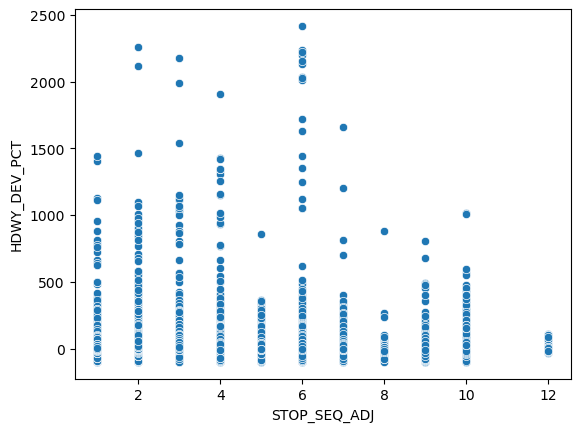

In [20]:
sns.scatterplot(data=headway_df_adj, x= 'STOP_SEQ_ADJ', y='HDWY_DEV_PCT');

In [21]:
# all unique keys
color_keys = headway_df_adj['ROUTE_ABBR_NUM'].unique()

# create key: color dictionary
colors = dict(zip(color_keys, sns.color_palette(['blue','coral','green','crimson','purple','sienna','violet','grey'])))

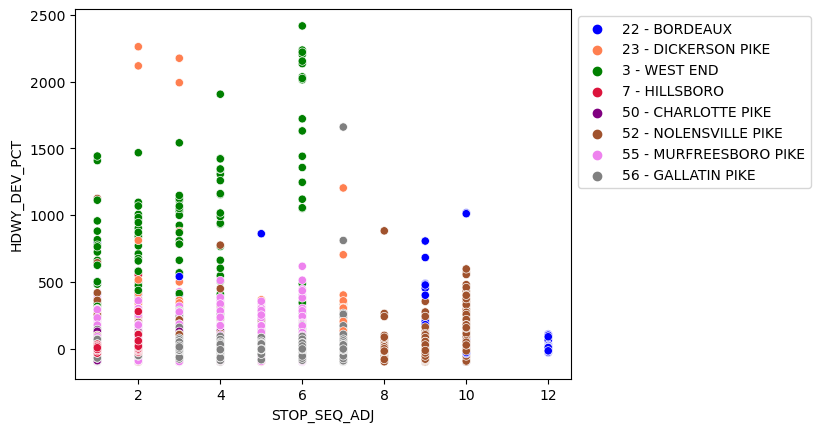

In [22]:
sns.scatterplot(data=headway_df_adj, x= 'STOP_SEQ_ADJ', y='HDWY_DEV_PCT',hue='ROUTE_ABBR_NUM', palette = colors)
plt.legend(bbox_to_anchor = (1, 1));

In [23]:
stop_seq_hdwy_dev_stdv_df = headway_df_adj.groupby(['ROUTE_ABBR_NUM','STOP_SEQ_ADJ'])['HDWY_DEV_PCT'].std().dropna().to_frame()
stop_seq_hdwy_dev_stdv_df

HDWY_DEV_PCT
ROUTE_ABBR_NUM         STOP_SEQ_ADJ              
22 - BORDEAUX          1.0              26.348619
                       2.0              28.941395
                       3.0              32.616108
                       5.0              33.622214
                       9.0              63.821547
                       10.0             45.567104
                       12.0             15.938272
23 - DICKERSON PIKE    1.0              32.477580
                       2.0              50.087331
                       3.0              51.159920
                       4.0              38.065043
                       5.0              39.569508
                       7.0              47.386014
3 - WEST END           1.0              47.757820
                       2.0              56.165492
                       3.0              66.062823
                       4.0              69.569470
                       5.0              37.335261
                       6.0             125.793519
50 - CHARLOTTE PIKE    2.0              25.620868
                       3.0              28.078292
                       4.0              29.442590
                       5.0              31.067449
52 - NOLENSVILLE PIKE  1.0              37.773992
                       2.0              42.075623
                       3.0              44.510739
                       4.0              46.624905
                       5.0              38.239851
                       6.0              40.540152
                       7.0              40.755286
                       8.0              94.061148
                       9.0              36.679205
                       10.0             85.735464
55 - MURFREESBORO PIKE 2.0              45.930867
                       3.0              48.621698
                       4.0              54.729973
                       5.0              58.684540
                       6.0              62.247584
56 - GALLATIN PIKE     2.0              28.053192
                       3.0              33.333628
                       4.0              38.810159
                       5.0              40.606857
                       6.0              46.891343
                       7.0              56.773169
7 - HILLSBORO          1.0              28.386372
                       2.0              37.823259

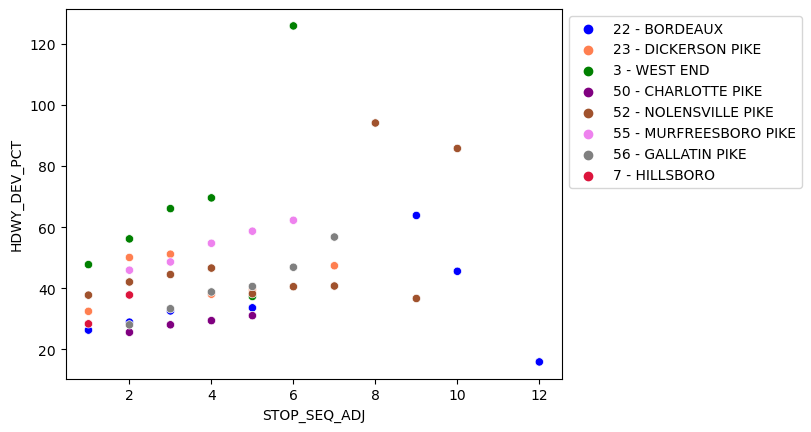

In [24]:
sns.scatterplot(data=stop_seq_hdwy_dev_stdv_df, x= 'STOP_SEQ_ADJ', y='HDWY_DEV_PCT',hue='ROUTE_ABBR_NUM', palette = colors)
plt.legend(bbox_to_anchor = (1, 1));
#sns.factorplot("age", "jobs", col="industry", row="city", data=df_city,
#               margin_titles=True, size=3, aspect=.8, palette=["darkred"])

<Axes: xlabel='ROUTE_ABBR_NUM,STOP_SEQ_ADJ'>

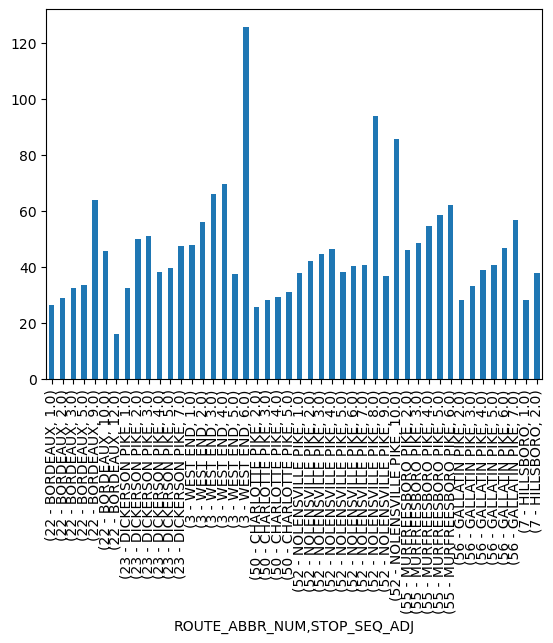

In [25]:
headway_df_adj.groupby(['ROUTE_ABBR_NUM','STOP_SEQ_ADJ'])['HDWY_DEV_PCT'].std().dropna().plot.bar()

In [26]:
#Adjusted Corrected Trip ID for Overload ID
headway_df_adj['CORRECTED_TRIP_ID2'] = headway_df_adj['CORRECTED_TRIP_ID'].astype(str) + '-' + headway_df_adj['OVERLOAD_ID'].astype(str)

In [27]:
headway_df_adj['STOP_SEQ_ADJ_RANK'] = headway_df_adj.groupby(['CORRECTED_TRIP_ID'])['STOP_SEQ_ADJ'].rank('max').copy()

In [28]:
#Adjusted STOP_SEQ_ADJ_RANK2 for Overload ID
headway_df_adj['STOP_SEQ_ADJ_RANK2'] = headway_df_adj.groupby(['CORRECTED_TRIP_ID2'])['STOP_SEQ_ADJ'].rank('max').copy()

In [29]:
headway_df_adj[headway_df_adj['TRIP_ID']==345104].iloc[0:30,0:20]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY
0,120230801,1,99457890,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN
1,120230801,1,99457891,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN
2,120230801,1,99457892,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN
3,120230801,1,99457893,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN
6461,120230802,1,99491784,2023-08-02,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-02 04:42:00,2023-08-02 04:34:38,2023-08-02 04:44:27,-2.450000,NaN
6462,120230802,1,99491785,2023-08-02,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-02 04:46:00,2023-08-02 04:49:00,2023-08-02 04:49:00,-3.000000,NaN
6463,120230802,1,99491786,2023-08-02,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-02 04:54:00,2023-08-02 04:54:19,2023-08-02 04:54:19,-0.316666,NaN
6464,120230802,1,99491787,2023-08-02,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-02 05:10:00,2023-08-02 05:01:59,2023-08-02 05:01:59,8.016666,NaN
12911,120230803,1,99525645,2023-08-03,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-03 04:42:00,2023-08-03 04:04:39,2023-08-03 04:42:46,-0.766666,NaN
12912,120230803,1,99525646,2023-08-03,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-03 04:46:00,2023-08-03 04:47:03,2023-08-03 04:47:03,-1.050000,NaN


In [30]:
len(headway_df_adj)

350328

In [31]:
headway_df_adj.iloc[0:30,0:20]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY
0,120230801,1,99457890,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN
1,120230801,1,99457891,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN
2,120230801,1,99457892,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN
3,120230801,1,99457893,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN
4,120230801,1,99457894,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN
5,120230801,1,99457895,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN
6,120230801,1,99457896,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN
7,120230801,1,99457897,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0
8,120230801,1,99457898,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0
9,120230801,1,99457899,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0


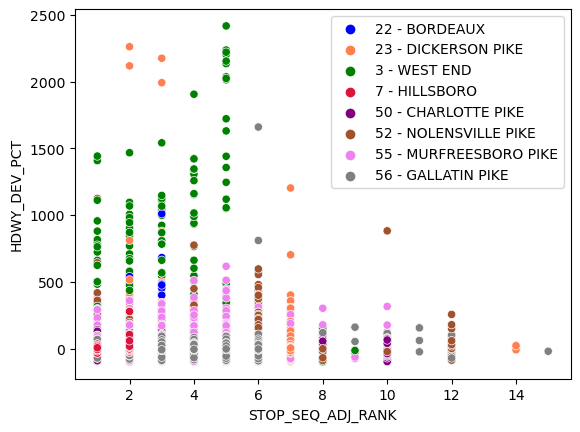

In [32]:
sns.scatterplot(data=headway_df_adj, x= 'STOP_SEQ_ADJ_RANK', y='HDWY_DEV_PCT', hue='ROUTE_ABBR_NUM', palette = colors)
plt.legend(bbox_to_anchor = (1, 1));

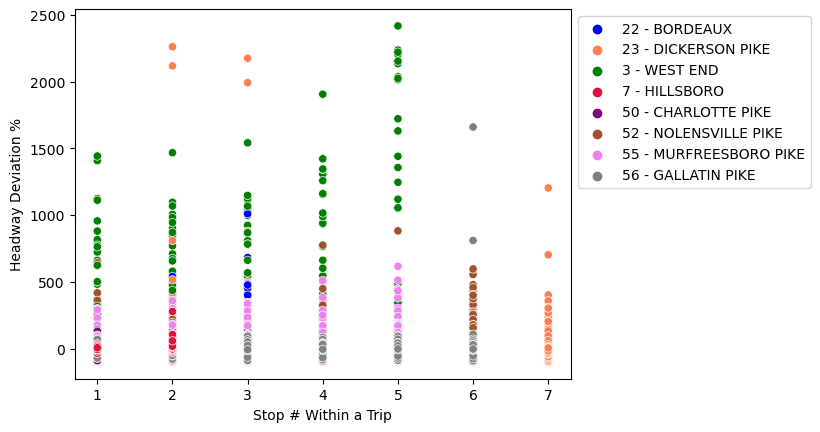

In [33]:
#Adjusted STOP_SEQ_ADJ_RANK2 for Overload ID
sns.scatterplot(data=headway_df_adj, x= 'STOP_SEQ_ADJ_RANK2', y='HDWY_DEV_PCT', hue='ROUTE_ABBR_NUM', palette = colors).set(xlabel = 'Stop # Within a Trip', ylabel = 'Headway Deviation %')
plt.legend(bbox_to_anchor = (1, 1));

In [34]:
headway_df_adj_subset = headway_df_adj[headway_df_adj['HDWY_DEV_PCT']<200]

In [35]:
headway_df_adj_subset_to_downtown = headway_df_adj_subset[headway_df_adj_subset['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN']
headway_df_adj_subset_from_downtown = headway_df_adj_subset[headway_df_adj_subset['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN']

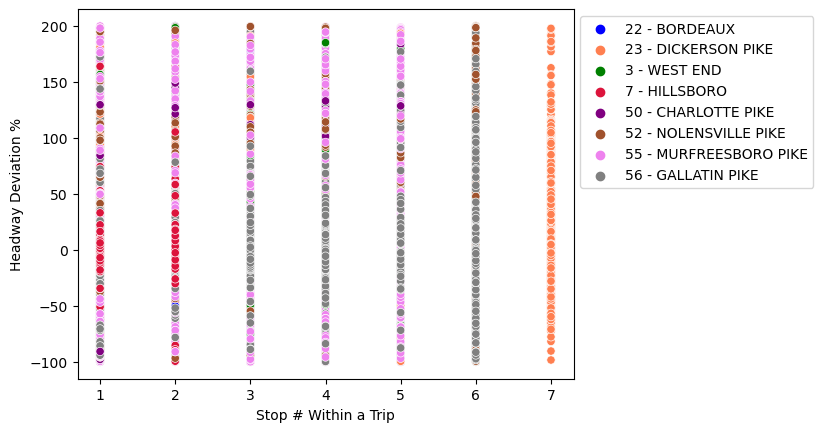

In [36]:
#Adjusted STOP_SEQ_ADJ_RANK2 for Overload ID
sns.scatterplot(data=headway_df_adj_subset, x= 'STOP_SEQ_ADJ_RANK2', y='HDWY_DEV_PCT', hue='ROUTE_ABBR_NUM', palette = colors).set(xlabel = 'Stop # Within a Trip', ylabel = 'Headway Deviation %')
plt.legend(bbox_to_anchor = (1, 1));

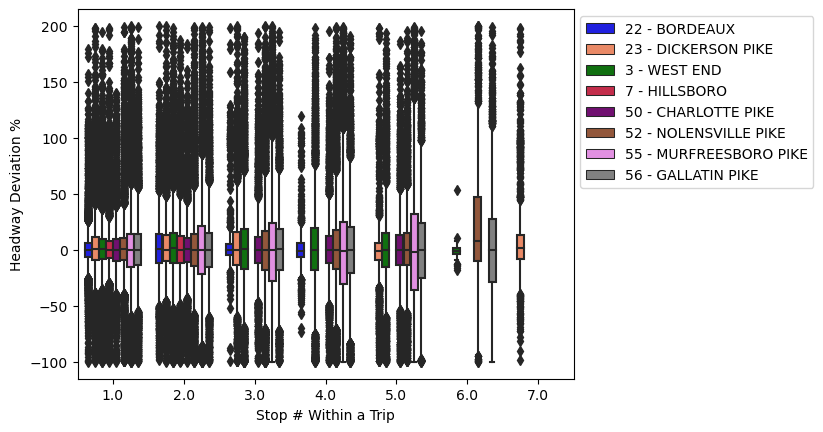

In [37]:
sns.boxplot(data=headway_df_adj_subset, x= 'STOP_SEQ_ADJ_RANK2', y='HDWY_DEV_PCT', hue='ROUTE_ABBR_NUM', palette = colors).set(xlabel = 'Stop # Within a Trip', ylabel = 'Headway Deviation %')
plt.legend(bbox_to_anchor = (1, 1));

In [38]:
stop_seq_rank_hdwy_dev_stdv_df = headway_df_adj.groupby(['ROUTE_ABBR_NUM','STOP_SEQ_ADJ_RANK2'])['HDWY_DEV_PCT'].std().dropna().to_frame()
stop_seq_rank_hdwy_dev_stdv_df

HDWY_DEV_PCT
ROUTE_ABBR_NUM         STOP_SEQ_ADJ_RANK2              
22 - BORDEAUX          1.0                    26.348619
                       2.0                    32.626861
                       3.0                    63.444811
                       4.0                    19.310319
23 - DICKERSON PIKE    1.0                    32.477580
                       2.0                    50.087331
                       3.0                    50.991232
                       5.0                    39.569508
                       7.0                    47.386014
3 - WEST END           1.0                    47.757970
                       2.0                    56.174682
                       3.0                    60.061818
                       4.0                    69.845746
                       5.0                   126.620222
                       6.0                     9.728845
50 - CHARLOTTE PIKE    2.0                    25.620868
                       3.0                    28.076258
                       4.0                    29.442590
                       5.0                    31.069698
52 - NOLENSVILLE PIKE  1.0                    37.800867
                       2.0                    41.065532
                       3.0                    43.542314
                       4.0                    45.181084
                       5.0                    39.992163
                       6.0                    76.657919
55 - MURFREESBORO PIKE 2.0                    47.225838
                       3.0                    51.731007
                       4.0                    55.741148
                       5.0                    62.220905
56 - GALLATIN PIKE     2.0                    30.963507
                       3.0                    35.728452
                       4.0                    40.012940
                       5.0                    46.889591
                       6.0                    56.735875
7 - HILLSBORO          1.0                    28.399634
                       2.0                    37.814917

In [39]:
stop_seq_rank_subset_hdwy_dev_stdv_df = headway_df_adj_subset.groupby(['ROUTE_ABBR_NUM','STOP_SEQ_ADJ_RANK2'])['HDWY_DEV_PCT'].std().dropna().to_frame()
stop_seq_rank_subset_hdwy_dev_stdv_df

HDWY_DEV_PCT
ROUTE_ABBR_NUM         STOP_SEQ_ADJ_RANK2              
22 - BORDEAUX          1.0                    21.578763
                       2.0                    29.028539
                       3.0                    27.268608
                       4.0                    19.310319
23 - DICKERSON PIKE    1.0                    29.828672
                       2.0                    30.044953
                       3.0                    33.053298
                       5.0                    34.692710
                       7.0                    32.158535
3 - WEST END           1.0                    27.238759
                       2.0                    35.328712
                       3.0                    39.052694
                       4.0                    40.686984
                       5.0                    37.751534
                       6.0                     9.728845
50 - CHARLOTTE PIKE    1.0                    23.254997
                       2.0                    25.271786
                       3.0                    27.543605
                       4.0                    28.773073
                       5.0                    30.290373
52 - NOLENSVILLE PIKE  1.0                    32.864616
                       2.0                    38.288318
                       3.0                    41.361471
                       4.0                    41.947579
                       5.0                    35.950633
                       6.0                    55.970796
55 - MURFREESBORO PIKE 1.0                    38.863446
                       2.0                    44.161744
                       3.0                    48.843373
                       4.0                    51.269459
                       5.0                    56.282505
56 - GALLATIN PIKE     1.0                    30.732311
                       2.0                    30.614547
                       3.0                    35.169736
                       4.0                    39.349191
                       5.0                    45.036689
                       6.0                    48.749666
7 - HILLSBORO          1.0                    26.987328
                       2.0                    32.735544

In [40]:
stop_seq_rank_subset_hdwy_dev_stdv_to_downtown_df = headway_df_adj_subset_to_downtown.groupby(['ROUTE_ABBR_NUM','STOP_SEQ_ADJ_RANK2'])['HDWY_DEV_PCT'].std().dropna().to_frame()
stop_seq_rank_subset_hdwy_dev_stdv_to_downtown_df

HDWY_DEV_PCT
ROUTE_ABBR_NUM         STOP_SEQ_ADJ_RANK2              
22 - BORDEAUX          1.0                    15.525112
                       2.0                    26.578686
                       3.0                    11.911029
                       4.0                    23.895557
23 - DICKERSON PIKE    1.0                    29.852223
                       2.0                    29.890381
                       3.0                    32.863683
3 - WEST END           1.0                    21.077090
                       2.0                    27.742772
                       3.0                    34.742100
                       4.0                    36.872117
                       5.0                    39.689970
50 - CHARLOTTE PIKE    1.0                    22.115699
                       2.0                    23.362302
                       3.0                    26.239954
                       4.0                    27.079649
                       5.0                    28.428814
52 - NOLENSVILLE PIKE  1.0                    24.595023
                       2.0                    30.054214
                       3.0                    35.526818
                       4.0                    37.809699
                       5.0                    38.135230
                       6.0                    39.967881
55 - MURFREESBORO PIKE 1.0                    34.512676
                       2.0                    39.281413
                       3.0                    44.726645
                       4.0                    47.510059
                       5.0                    54.934502
56 - GALLATIN PIKE     1.0                    24.864978
                       2.0                    27.905363
                       3.0                    32.589858
                       4.0                    38.803954
7 - HILLSBORO          1.0                    25.769600
                       2.0                    28.844789

In [41]:
stop_seq_rank_subset_hdwy_dev_stdv_from_downtown_df = headway_df_adj_subset_from_downtown.groupby(['ROUTE_ABBR_NUM','STOP_SEQ_ADJ_RANK2'])['HDWY_DEV_PCT'].std().dropna().to_frame()
stop_seq_rank_subset_hdwy_dev_stdv_from_downtown_df

HDWY_DEV_PCT
ROUTE_ABBR_NUM         STOP_SEQ_ADJ_RANK2              
22 - BORDEAUX          1.0                    26.078930
                       2.0                    31.255054
                       3.0                    32.652992
                       4.0                    15.938272
23 - DICKERSON PIKE    1.0                    29.809202
                       2.0                    30.204643
                       3.0                    33.236343
                       5.0                    34.692710
                       7.0                    32.158535
3 - WEST END           1.0                    32.202248
                       2.0                    41.525623
                       3.0                    43.000033
                       4.0                    44.241055
                       5.0                    35.555881
                       6.0                     9.728845
50 - CHARLOTTE PIKE    1.0                    24.350093
                       2.0                    27.042581
                       3.0                    28.792082
                       4.0                    30.378767
                       5.0                    32.049316
52 - NOLENSVILLE PIKE  1.0                    39.090257
                       2.0                    44.908008
                       3.0                    46.414164
                       4.0                    45.720608
                       5.0                    33.603381
                       6.0                    59.398652
55 - MURFREESBORO PIKE 1.0                    42.876975
                       2.0                    48.710647
                       3.0                    52.658293
                       4.0                    54.781463
                       5.0                    57.603574
56 - GALLATIN PIKE     1.0                    35.616454
                       2.0                    33.109018
                       3.0                    37.575699
                       4.0                    39.890428
                       5.0                    45.036689
                       6.0                    48.749666
7 - HILLSBORO          1.0                    28.113926
                       2.0                    36.111994

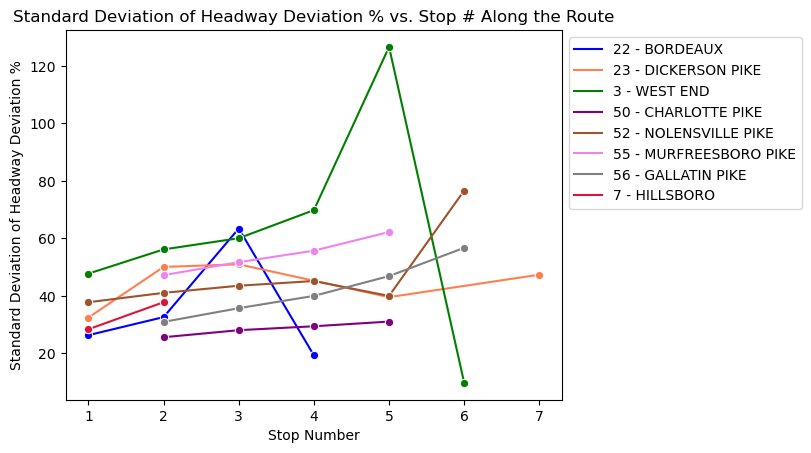

In [42]:
sns.lineplot(data=stop_seq_rank_hdwy_dev_stdv_df, x = 'STOP_SEQ_ADJ_RANK2', y = 'HDWY_DEV_PCT', hue= 'ROUTE_ABBR_NUM', palette = colors, marker = 'o').set(title='Standard Deviation of Headway Deviation % vs. Stop # Along the Route', xlabel = 'Stop Number', ylabel = 'Standard Deviation of Headway Deviation %')
plt.legend(bbox_to_anchor = (1, 1));

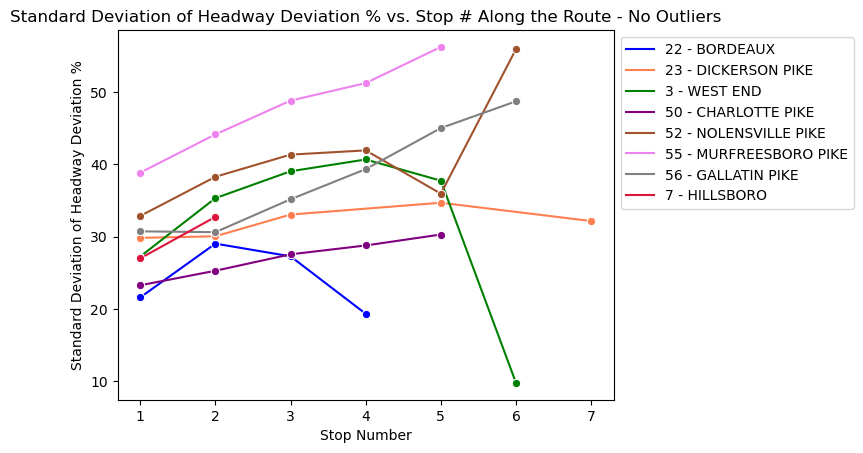

In [43]:
sns.lineplot(data=stop_seq_rank_subset_hdwy_dev_stdv_df, x = 'STOP_SEQ_ADJ_RANK2', y = 'HDWY_DEV_PCT', hue= 'ROUTE_ABBR_NUM', palette = colors, marker = 'o').set(title='Standard Deviation of Headway Deviation % vs. Stop # Along the Route - No Outliers', xlabel = 'Stop Number', ylabel = 'Standard Deviation of Headway Deviation %')
plt.legend(bbox_to_anchor = (1, 1));

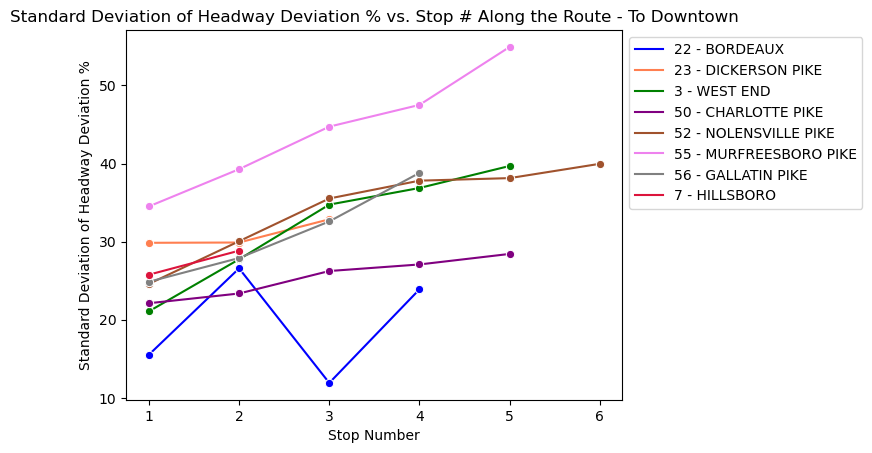

In [44]:
sns.lineplot(data=stop_seq_rank_subset_hdwy_dev_stdv_to_downtown_df, x = 'STOP_SEQ_ADJ_RANK2', y = 'HDWY_DEV_PCT', hue= 'ROUTE_ABBR_NUM', palette = colors, marker = 'o').set(title='Standard Deviation of Headway Deviation % vs. Stop # Along the Route - To Downtown', xlabel = 'Stop Number', ylabel = 'Standard Deviation of Headway Deviation %')
plt.legend(bbox_to_anchor = (1, 1));

In [45]:
stop_seq_rank_hdwy_dev_mean_df = headway_df_adj.groupby(['ROUTE_ABBR_NUM','STOP_SEQ_ADJ_RANK2'])['HDWY_DEV_PCT'].mean().dropna().to_frame()
stop_seq_rank_hdwy_dev_mean_df

HDWY_DEV_PCT
ROUTE_ABBR_NUM         STOP_SEQ_ADJ_RANK2              
22 - BORDEAUX          1.0                     2.303221
                       2.0                     3.205123
                       3.0                    11.694578
                       4.0                     1.107283
23 - DICKERSON PIKE    1.0                     4.547439
                       2.0                     5.989666
                       3.0                     6.071243
                       5.0                     0.359293
                       7.0                     9.708903
3 - WEST END           1.0                     3.810941
                       2.0                     6.152093
                       3.0                     4.821080
                       4.0                     5.508095
                       5.0                    10.357648
                       6.0                    -1.066499
50 - CHARLOTTE PIKE    2.0                     1.276638
                       3.0                     1.326086
                       4.0                     1.216815
                       5.0                     1.228600
52 - NOLENSVILLE PIKE  1.0                     3.547807
                       2.0                     2.650091
                       3.0                     2.254244
                       4.0                     2.784661
                       5.0                     2.585325
                       6.0                    30.867693
55 - MURFREESBORO PIKE 2.0                     2.312023
                       3.0                     2.246742
                       4.0                     2.789850
                       5.0                     3.144544
56 - GALLATIN PIKE     2.0                     1.108410
                       3.0                     1.194698
                       4.0                     1.079639
                       5.0                     1.727721
                       6.0                     2.539575
7 - HILLSBORO          1.0                     1.827214
                       2.0                     2.556353

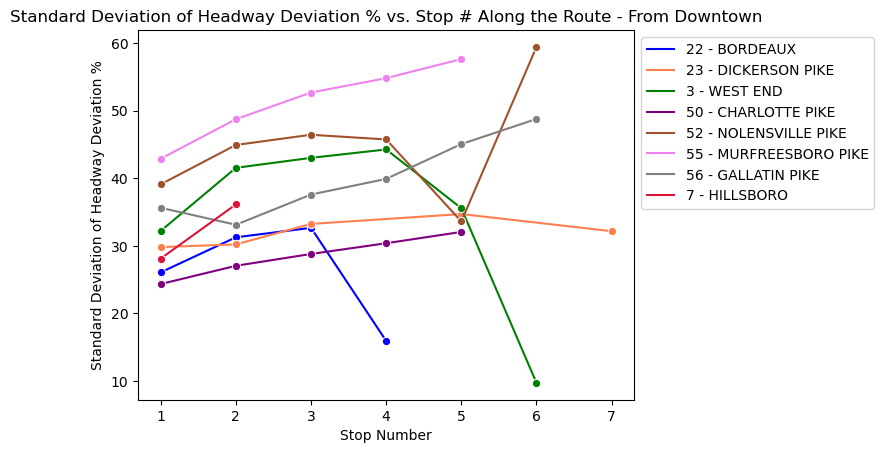

In [46]:
sns.lineplot(data=stop_seq_rank_subset_hdwy_dev_stdv_from_downtown_df, x = 'STOP_SEQ_ADJ_RANK2', y = 'HDWY_DEV_PCT', hue= 'ROUTE_ABBR_NUM', palette = colors, marker = 'o').set(title='Standard Deviation of Headway Deviation % vs. Stop # Along the Route - From Downtown', xlabel = 'Stop Number', ylabel = 'Standard Deviation of Headway Deviation %')
plt.legend(bbox_to_anchor = (1, 1));

In [47]:
stop_seq_rank_subset_hdwy_dev_mean_df = headway_df_adj_subset.groupby(['ROUTE_ABBR_NUM','STOP_SEQ_ADJ_RANK2'])['HDWY_DEV_PCT'].mean().dropna().to_frame()
stop_seq_rank_subset_hdwy_dev_mean_df

HDWY_DEV_PCT
ROUTE_ABBR_NUM         STOP_SEQ_ADJ_RANK2              
22 - BORDEAUX          1.0                     1.746101
                       2.0                     2.719729
                       3.0                     6.032499
                       4.0                     1.107283
23 - DICKERSON PIKE    1.0                     3.911081
                       2.0                     4.333448
                       3.0                     4.468075
                       5.0                    -1.036372
                       7.0                     7.444564
3 - WEST END           1.0                     1.904671
                       2.0                     3.650134
                       3.0                     2.237906
                       4.0                     2.143267
                       5.0                     1.895293
                       6.0                    -1.066499
50 - CHARLOTTE PIKE    1.0                     0.839379
                       2.0                     1.204548
                       3.0                     1.194791
                       4.0                     1.048422
                       5.0                     1.024173
52 - NOLENSVILLE PIKE  1.0                     2.764659
                       2.0                     1.745553
                       3.0                     1.465212
                       4.0                     1.882186
                       5.0                     1.893157
                       6.0                    20.445380
55 - MURFREESBORO PIKE 1.0                     1.544885
                       2.0                     1.187854
                       3.0                     1.046539
                       4.0                     0.984096
                       5.0                     0.522755
56 - GALLATIN PIKE     1.0                     0.954925
                       2.0                     1.013566
                       3.0                     1.023878
                       4.0                     0.855718
                       5.0                     1.079222
                       6.0                     1.463593
7 - HILLSBORO          1.0                     1.523390
                       2.0                     1.372684

In [48]:
stop_seq_rank_subset_hdwy_dev_mean_to_downtown_df = headway_df_adj_subset_to_downtown.groupby(['ROUTE_ABBR_NUM','STOP_SEQ_ADJ_RANK2'])['HDWY_DEV_PCT'].mean().dropna().to_frame()
stop_seq_rank_subset_hdwy_dev_mean_to_downtown_df

HDWY_DEV_PCT
ROUTE_ABBR_NUM         STOP_SEQ_ADJ_RANK2              
22 - BORDEAUX          1.0                     1.780458
                       2.0                     2.543627
                       3.0                    -0.400485
                       4.0                    -0.303580
23 - DICKERSON PIKE    1.0                     4.056381
                       2.0                     4.504951
                       3.0                     4.484529
3 - WEST END           1.0                     2.249611
                       2.0                     4.742898
                       3.0                     2.006179
                       4.0                     2.381195
                       5.0                     0.669710
50 - CHARLOTTE PIKE    1.0                     0.918984
                       2.0                     1.383364
                       3.0                     1.298579
                       4.0                     1.109078
                       5.0                     1.120253
52 - NOLENSVILLE PIKE  1.0                     3.632753
                       2.0                     1.838749
                       3.0                     1.223597
                       4.0                     2.526287
                       5.0                     1.816370
                       6.0                     8.334607
55 - MURFREESBORO PIKE 1.0                     2.074527
                       2.0                     1.408521
                       3.0                     1.595658
                       4.0                     1.405054
                       5.0                     0.401585
56 - GALLATIN PIKE     1.0                     1.317873
                       2.0                     0.949155
                       3.0                     0.958803
                       4.0                     0.705628
7 - HILLSBORO          1.0                     1.374494
                       2.0                     1.131372

In [49]:
stop_seq_rank_subset_hdwy_dev_mean_from_downtown_df = headway_df_adj_subset_from_downtown.groupby(['ROUTE_ABBR_NUM','STOP_SEQ_ADJ_RANK2'])['HDWY_DEV_PCT'].mean().dropna().to_frame()
stop_seq_rank_subset_hdwy_dev_mean_from_downtown_df

HDWY_DEV_PCT
ROUTE_ABBR_NUM         STOP_SEQ_ADJ_RANK2              
22 - BORDEAUX          1.0                     1.713316
                       2.0                     2.893016
                       3.0                     9.902571
                       4.0                     1.944687
23 - DICKERSON PIKE    1.0                     3.772767
                       2.0                     4.158585
                       3.0                     4.452456
                       5.0                    -1.036372
                       7.0                     7.444564
3 - WEST END           1.0                     1.562764
                       2.0                     2.557642
                       3.0                     2.473654
                       4.0                     1.900783
                       5.0                     3.188891
                       6.0                    -1.066499
50 - CHARLOTTE PIKE    1.0                     0.759314
                       2.0                     1.026405
                       3.0                     1.090972
                       4.0                     0.987661
                       5.0                     0.928009
52 - NOLENSVILLE PIKE  1.0                     1.944182
                       2.0                     1.654398
                       3.0                     1.703917
                       4.0                     1.235806
                       5.0                     1.970903
                       6.0                    23.992225
55 - MURFREESBORO PIKE 1.0                     1.000144
                       2.0                     0.959093
                       3.0                     0.494374
                       4.0                     0.562100
                       5.0                     0.643850
56 - GALLATIN PIKE     1.0                     0.594295
                       2.0                     1.078071
                       3.0                     1.088939
                       4.0                     1.005807
                       5.0                     1.079222
                       6.0                     1.463593
7 - HILLSBORO          1.0                     1.666791
                       2.0                     1.606555

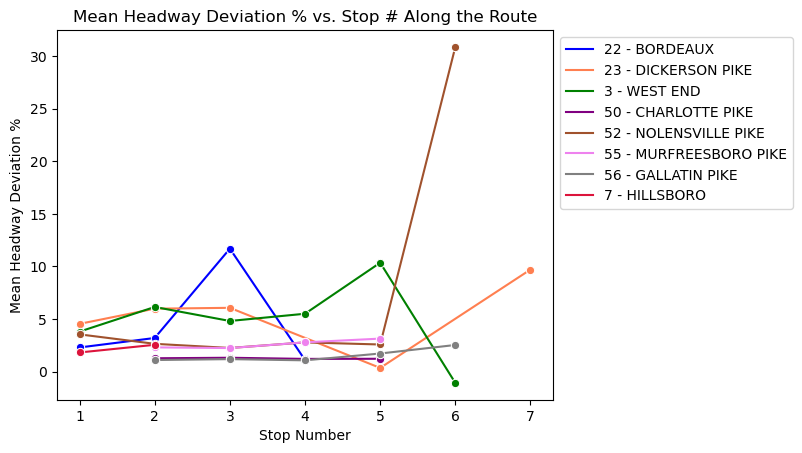

In [50]:
sns.lineplot(data=stop_seq_rank_hdwy_dev_mean_df, x = 'STOP_SEQ_ADJ_RANK2', y = 'HDWY_DEV_PCT', hue= 'ROUTE_ABBR_NUM', palette = colors, marker = 'o').set(title='Mean Headway Deviation % vs. Stop # Along the Route', xlabel = 'Stop Number', ylabel = 'Mean Headway Deviation %')
plt.legend(bbox_to_anchor = (1, 1));

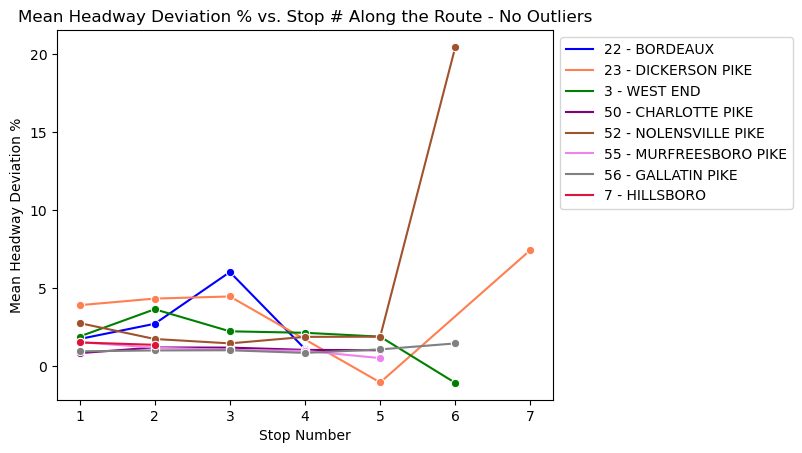

In [51]:
sns.lineplot(data=stop_seq_rank_subset_hdwy_dev_mean_df, x = 'STOP_SEQ_ADJ_RANK2', y = 'HDWY_DEV_PCT', hue= 'ROUTE_ABBR_NUM', palette = colors, marker = 'o').set(title='Mean Headway Deviation % vs. Stop # Along the Route - No Outliers', xlabel = 'Stop Number', ylabel = 'Mean Headway Deviation %')
plt.legend(bbox_to_anchor = (1, 1));

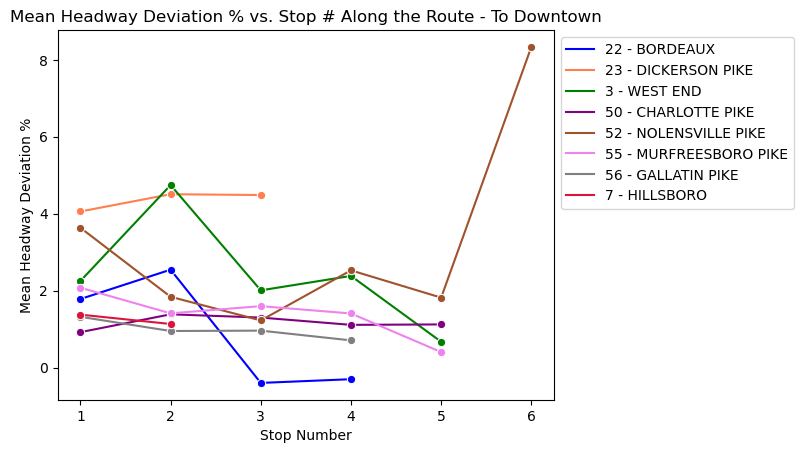

In [52]:
sns.lineplot(data=stop_seq_rank_subset_hdwy_dev_mean_to_downtown_df, x = 'STOP_SEQ_ADJ_RANK2', y = 'HDWY_DEV_PCT', hue= 'ROUTE_ABBR_NUM', palette = colors, marker = 'o').set(title='Mean Headway Deviation % vs. Stop # Along the Route - To Downtown', xlabel = 'Stop Number', ylabel = 'Mean Headway Deviation %')
plt.legend(bbox_to_anchor = (1, 1));

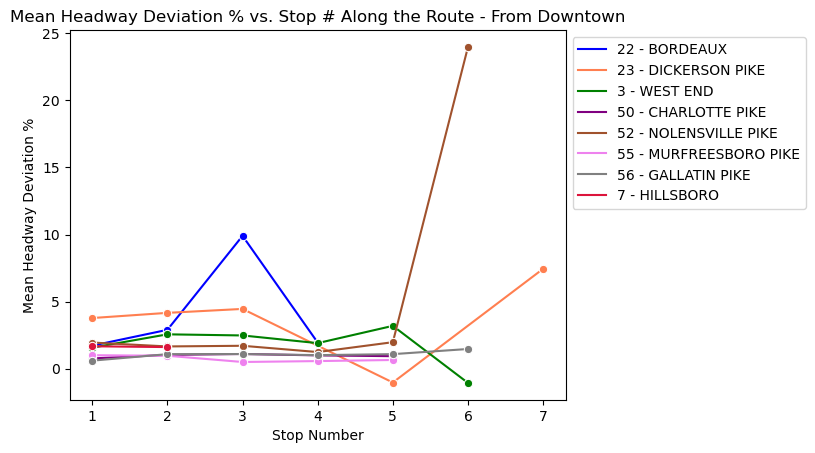

In [53]:
sns.lineplot(data=stop_seq_rank_subset_hdwy_dev_mean_from_downtown_df, x = 'STOP_SEQ_ADJ_RANK2', y = 'HDWY_DEV_PCT', hue= 'ROUTE_ABBR_NUM', palette = colors, marker = 'o').set(title='Mean Headway Deviation % vs. Stop # Along the Route - From Downtown', xlabel = 'Stop Number', ylabel = 'Mean Headway Deviation %')
plt.legend(bbox_to_anchor = (1, 1));

In [60]:
headway_df_adj_subset['ABS(HDWY_DEV_PCT)'] = headway_df_adj_subset['HDWY_DEV_PCT'].apply(abs)
headway_df_adj_subset_to_downtown['ABS(HDWY_DEV_PCT)'] = headway_df_adj_subset_to_downtown['HDWY_DEV_PCT'].apply(abs)
headway_df_adj_subset_from_downtown['ABS(HDWY_DEV_PCT)'] = headway_df_adj_subset_from_downtown['HDWY_DEV_PCT'].apply(abs)
headway_df_adj_subset.iloc[0:10,30:]

C:\Users\Alex Balli\AppData\Local\Temp\ipykernel_28444\3318141238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headway_df_adj_subset['ABS(HDWY_DEV_PCT)'] = headway_df_adj_subset['HDWY_DEV_PCT'].apply(abs)
C:\Users\Alex Balli\AppData\Local\Temp\ipykernel_28444\3318141238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headway_df_adj_subset_to_downtown['ABS(HDWY_DEV_PCT)'] = headway_df_adj_subset_to_downtown['HDWY_DEV_PCT'].apply(abs)
C:\Users\Alex Balli\AppData\Local\Temp\ipykernel_28444\331814123

,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START,STOP_SEQ_ADJ,ROUTE_ABBR_NUM,HDWY_DEV_PCT,CORRECTED_TRIP_ID2,STOP_SEQ_ADJ_RANK,STOP_SEQ_ADJ_RANK2,ABS(HDWY_DEV_PCT)
7,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43,1.0,22 - BORDEAUX,7.619046,2023-08-01 - 345106-0,1.0,1.0,7.619046
8,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43,5.0,22 - BORDEAUX,5.619046,2023-08-01 - 345106-0,2.0,2.0,5.619046
9,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43,10.0,22 - BORDEAUX,-3.222227,2023-08-01 - 345106-0,3.0,3.0,3.222227
11,2023-08-01 - 345107,22,ON TIME,1.0,2023-08-01 06:15:00,2023-08-01 06:16:19,1.0,22 - BORDEAUX,-14.444447,2023-08-01 - 345107-0,1.0,1.0,14.444447
12,2023-08-01 - 345107,22,EARLY,1.0,2023-08-01 06:15:00,2023-08-01 06:16:19,5.0,22 - BORDEAUX,-25.888893,2023-08-01 - 345107-0,2.0,2.0,25.888893
14,2023-08-01 - 345108,22,ON TIME,14.0,2023-08-01 06:42:00,2023-08-01 06:43:31,1.0,22 - BORDEAUX,-0.333333,2023-08-01 - 345108-0,1.0,1.0,0.333333
15,2023-08-01 - 345108,22,ON TIME,14.0,2023-08-01 06:42:00,2023-08-01 06:43:31,5.0,22 - BORDEAUX,0.138888,2023-08-01 - 345108-0,2.0,2.0,0.138888
16,2023-08-01 - 345108,22,ON TIME,14.0,2023-08-01 06:42:00,2023-08-01 06:43:31,10.0,22 - BORDEAUX,18.111107,2023-08-01 - 345108-0,3.0,3.0,18.111107
18,2023-08-01 - 345109,22,ON TIME,1.0,2023-08-01 07:15:00,2023-08-01 07:16:44,1.0,22 - BORDEAUX,1.555553,2023-08-01 - 345109-0,1.0,1.0,1.555553
19,2023-08-01 - 345109,22,ON TIME,1.0,2023-08-01 07:15:00,2023-08-01 07:16:44,5.0,22 - BORDEAUX,-2.555560,2023-08-01 - 345109-0,2.0,2.0,2.555560


In [56]:
stop_seq_rank_subset_hdwy_dev_mean_abs_df = headway_df_adj_subset.groupby(['ROUTE_ABBR_NUM','STOP_SEQ_ADJ_RANK2'])['ABS(HDWY_DEV_PCT)'].mean().dropna().to_frame()
stop_seq_rank_subset_hdwy_dev_mean_abs_df

ABS(HDWY_DEV_PCT)
ROUTE_ABBR_NUM         STOP_SEQ_ADJ_RANK2                   
22 - BORDEAUX          1.0                         12.433450
                       2.0                         19.640887
                       3.0                         12.521486
                       4.0                         11.193137
23 - DICKERSON PIKE    1.0                         18.052564
                       2.0                         19.194920
                       3.0                         22.114867
                       5.0                         20.036050
                       7.0                         19.348759
3 - WEST END           1.0                         16.512961
                       2.0                         23.287180
                       3.0                         27.149579
                       4.0                         28.707557
                       5.0                         24.969656
                       6.0                          5.301793
50 - CHARLOTTE PIKE    1.0                         15.153592
                       2.0                         16.625114
                       3.0                         18.398601
                       4.0                         19.269761
                       5.0                         20.500470
52 - NOLENSVILLE PIKE  1.0                         20.160981
                       2.0                         25.202636
                       3.0                         28.475329
                       4.0                         28.841898
                       5.0                         24.149066
                       6.0                         41.436702
55 - MURFREESBORO PIKE 1.0                         25.808189
                       2.0                         31.588481
                       3.0                         36.203707
                       4.0                         38.084126
                       5.0                         43.499669
56 - GALLATIN PIKE     1.0                         21.072766
                       2.0                         21.379161
                       3.0                         25.399644
                       4.0                         28.849946
                       5.0                         33.669161
                       6.0                         37.135407
7 - HILLSBORO          1.0                         15.281822
                       2.0                         20.917453

In [61]:
stop_seq_rank_subset_hdwy_dev_mean_abs_to_downtown_df = headway_df_adj_subset_to_downtown.groupby(['ROUTE_ABBR_NUM','STOP_SEQ_ADJ_RANK2'])['ABS(HDWY_DEV_PCT)'].mean().dropna().to_frame()
stop_seq_rank_subset_hdwy_dev_mean_abs_to_downtown_df

ABS(HDWY_DEV_PCT)
ROUTE_ABBR_NUM         STOP_SEQ_ADJ_RANK2                   
22 - BORDEAUX          1.0                          6.951840
                       2.0                         17.488651
                       3.0                          6.234700
                       4.0                         16.231092
23 - DICKERSON PIKE    1.0                         17.446042
                       2.0                         19.060345
                       3.0                         22.101196
3 - WEST END           1.0                         11.544375
                       2.0                         16.959580
                       3.0                         23.350885
                       4.0                         25.042292
                       5.0                         26.985295
50 - CHARLOTTE PIKE    1.0                         14.536233
                       2.0                         15.602512
                       3.0                         17.846324
                       4.0                         18.077788
                       5.0                         19.014746
52 - NOLENSVILLE PIKE  1.0                         12.482358
                       2.0                         18.325859
                       3.0                         23.719228
                       4.0                         25.852832
                       5.0                         26.426017
                       6.0                         29.017909
55 - MURFREESBORO PIKE 1.0                         21.615360
                       2.0                         27.059820
                       3.0                         32.966379
                       4.0                         34.340183
                       5.0                         42.123726
56 - GALLATIN PIKE     1.0                         15.961877
                       2.0                         19.310300
                       3.0                         23.186300
                       4.0                         28.618174
7 - HILLSBORO          1.0                         13.839818
                       2.0                         17.628489

In [62]:
stop_seq_rank_subset_hdwy_dev_mean_abs_from_downtown_df = headway_df_adj_subset_from_downtown.groupby(['ROUTE_ABBR_NUM','STOP_SEQ_ADJ_RANK2'])['ABS(HDWY_DEV_PCT)'].mean().dropna().to_frame()
stop_seq_rank_subset_hdwy_dev_mean_abs_from_downtown_df

ABS(HDWY_DEV_PCT)
ROUTE_ABBR_NUM         STOP_SEQ_ADJ_RANK2                   
22 - BORDEAUX          1.0                         17.664473
                       2.0                         21.758705
                       3.0                         16.303605
                       4.0                          8.202911
23 - DICKERSON PIKE    1.0                         18.629930
                       2.0                         19.332132
                       3.0                         22.127845
                       5.0                         20.036050
                       7.0                         19.348759
3 - WEST END           1.0                         21.437867
                       2.0                         29.613210
                       3.0                         31.014206
                       4.0                         32.443011
                       5.0                         22.842156
                       6.0                          5.301793
50 - CHARLOTTE PIKE    1.0                         15.774511
                       2.0                         17.643872
                       3.0                         18.951039
                       4.0                         20.463808
                       5.0                         21.987486
52 - NOLENSVILLE PIKE  1.0                         27.418415
                       2.0                         31.928720
                       3.0                         33.174168
                       4.0                         31.841539
                       5.0                         21.843681
                       6.0                         45.073755
55 - MURFREESBORO PIKE 1.0                         30.120546
                       2.0                         36.283255
                       3.0                         39.458988
                       4.0                         41.837296
                       5.0                         44.874763
56 - GALLATIN PIKE     1.0                         26.151001
                       2.0                         23.451018
                       3.0                         27.612530
                       4.0                         29.081718
                       5.0                         33.669161
                       6.0                         37.135407
7 - HILLSBORO          1.0                         16.670618
                       2.0                         24.105010

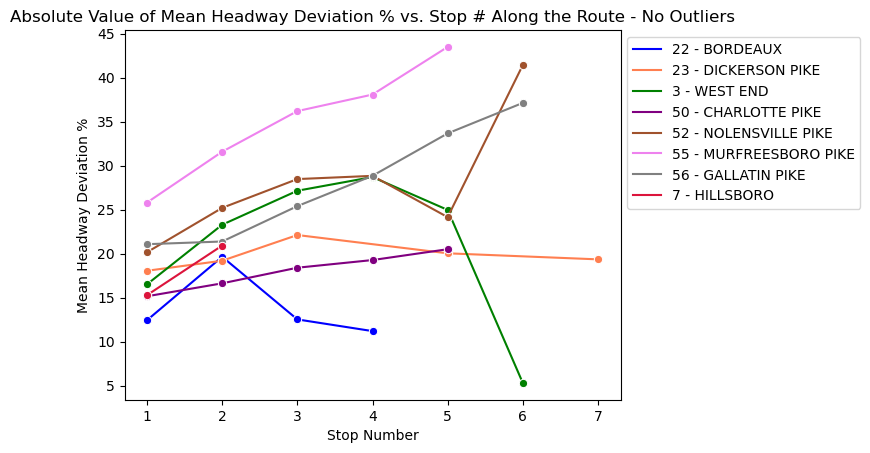

In [58]:
sns.lineplot(data=stop_seq_rank_subset_hdwy_dev_mean_abs_df, x = 'STOP_SEQ_ADJ_RANK2', y = 'ABS(HDWY_DEV_PCT)', hue= 'ROUTE_ABBR_NUM', palette = colors, marker = 'o').set(title='Absolute Value of Mean Headway Deviation % vs. Stop # Along the Route - No Outliers', xlabel = 'Stop Number', ylabel = 'Mean Headway Deviation %')
plt.legend(bbox_to_anchor = (1, 1));

In [ ]:
sns.lineplot(data=stop_seq_rank_subset_hdwy_dev_mean_abs_to_downtown_df, x = 'STOP_SEQ_ADJ_RANK2', y = 'ABS(HDWY_DEV_PCT)', hue= 'ROUTE_ABBR_NUM', palette = colors, marker = 'o').set(title='Absolute Value of Mean Headway Deviation % vs. Stop # Along the Route - To Downtown', xlabel = 'Stop Number', ylabel = 'Mean Headway Deviation %')
plt.legend(bbox_to_anchor = (1, 1));

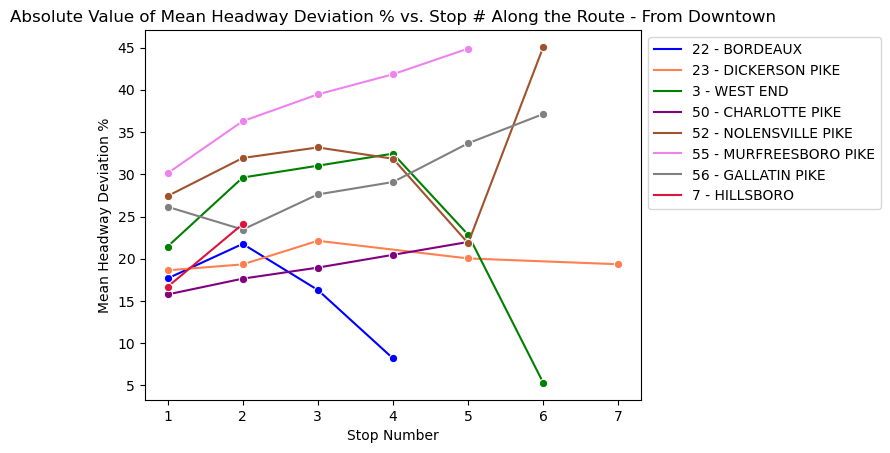

In [63]:
sns.lineplot(data=stop_seq_rank_subset_hdwy_dev_mean_abs_from_downtown_df, x = 'STOP_SEQ_ADJ_RANK2', y = 'ABS(HDWY_DEV_PCT)', hue= 'ROUTE_ABBR_NUM', palette = colors, marker = 'o').set(title='Absolute Value of Mean Headway Deviation % vs. Stop # Along the Route - From Downtown', xlabel = 'Stop Number', ylabel = 'Mean Headway Deviation %')
plt.legend(bbox_to_anchor = (1, 1));

In [ ]:
headway_df_adj[(headway_df_adj['STOP_SEQ_ADJ_RANK']==15) & (headway_df_adj['ROUTE_ABBR']=='GALLATIN PIKE')].iloc[:,0:20]

In [ ]:
type(headway_df_adj['ACTUAL_DEPARTURE_TIME'][0])

In [ ]:
headway_df_adj['TIME_SINCE_ACTUAL_START'] = (pd.Series(headway_df_adj['ACTUAL_DEPARTURE_TIME'].dt.to_pydatetime())-pd.Series(headway_df_adj['ROUTE_ACTUAL_START'].dt.to_pydatetime())).dt.total_seconds()/60
headway_df_adj['TIME_SINCE_SCHED_START'] = (pd.Series(headway_df_adj['ACTUAL_DEPARTURE_TIME'].dt.to_pydatetime())-pd.Series(headway_df_adj['ROUTE_SCHED_START'].dt.to_pydatetime())).dt.total_seconds()/60

#First attempt at adjusting for miscalculated time difference values due to overnight change in date
#headway_df_adj.loc[headway_df_adj['TIME_SINCE_ACTUAL_START'] < -50000, 'TIME_SINCE_ACTUAL_START'] = 86400+headway_df_adj['TIME_SINCE_ACTUAL_START']
#headway_df_adj.loc[headway_df_adj['TIME_SINCE_SCHED_START'] < -50000, 'TIME_SINCE_SCHED_START'] = 86400+headway_df_adj['TIME_SINCE_SCHED_START']

In [ ]:
headway_df_adj['TIME_SINCE_ACTUAL_START'] = np.where(headway_df_adj['TIME_SINCE_ACTUAL_START']<0,np.nan,headway_df_adj['TIME_SINCE_ACTUAL_START'])

In [ ]:
headway_df_adj[headway_df_adj['TIME_SINCE_ACTUAL_START'].isnull()].head(20)

In [ ]:
sns.scatterplot(data=headway_df_adj, x= 'TIME_SINCE_ACTUAL_START', y='HDWY_DEV_PCT', hue='ROUTE_ABBR_NUM', palette = colors);

In [ ]:
headway_df_adj_actual300 = headway_df_adj_subset[headway_df_adj_subset['TIME_SINCE_ACTUAL_START']<300]
sns.scatterplot(data=headway_df_adj_actual300, x= 'TIME_SINCE_ACTUAL_START', y='HDWY_DEV_PCT', hue='ROUTE_ABBR_NUM', palette = colors)
plt.legend(bbox_to_anchor = (1, 1));

In [ ]:
headway_df_adj_actual50 = headway_df_adj_subset[headway_df_adj_subset['TIME_SINCE_ACTUAL_START']<50]
sns.scatterplot(data=headway_df_adj_actual50, x= 'TIME_SINCE_ACTUAL_START', y='HDWY_DEV_PCT', hue='ROUTE_ABBR_NUM', palette = colors)
plt.legend(bbox_to_anchor = (1, 1));

In [ ]:
sns.lineplot(data=headway_df_adj_actual300[headway_df_adj_actual300['ROUTE_ABBR']=='WEST END'], x= 'TIME_SINCE_ACTUAL_START', y='HDWY_DEV_PCT', color = 'green', style = 'CORRECTED_TRIP_ID2', legend = False).set(title='Headway Deviation % vs. Time Since Actual Start for Route 3 - West End');

In [ ]:
sns.scatterplot(data=headway_df_adj_actual300[headway_df_adj_actual300['ROUTE_ABBR']=='WEST END'], x= 'TIME_SINCE_ACTUAL_START', y='HDWY_DEV_PCT', color = 'green').set(title='Headway Deviation % vs. Time Since Actual Start for Route 3 - West End');

In [ ]:
sns.scatterplot(data=headway_df_adj_actual300[headway_df_adj_actual300['ROUTE_ABBR']=='MURFREESBORO PIKE'], x= 'TIME_SINCE_ACTUAL_START', y='HDWY_DEV_PCT', color = 'violet').set(title='Headway Deviation % vs. Time Since Actual Start for Route 55 - Murfreesboro Pike');

In [ ]:
sns.lineplot(data=headway_df_adj_actual300[headway_df_adj_actual300['ROUTE_ABBR']=='MURFREESBORO PIKE'], x= 'TIME_SINCE_ACTUAL_START', y='HDWY_DEV_PCT', color = 'violet', style = 'CORRECTED_TRIP_ID2', legend = False).set(title='Headway Deviation % vs. Time Since Actual Start for Route 55 - Murfreesboro Pike');

In [ ]:
sns.lineplot(data=headway_df_adj_actual50[headway_df_adj_actual50['ROUTE_ABBR']=='MURFREESBORO PIKE'], x= 'TIME_SINCE_ACTUAL_START', y='HDWY_DEV_PCT', color = 'violet', style = 'CORRECTED_TRIP_ID2', legend = False).set(title='Headway Deviation % vs. Time Since Actual Start for Route 55 - Murfreesboro Pike');

In [ ]:
headway_df_adj[headway_df_adj['TIME_SINCE_ACTUAL_START']<0].head()

In [ ]:
headway_df_adj[headway_df_adj['TIME_SINCE_ACTUAL_START']<0].iloc[0:50,15:]

In [ ]:
sns.scatterplot(data=headway_df_adj, x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT', hue='ROUTE_ABBR_NUM', palette = colors);

In [ ]:
headway_df_adj[headway_df_adj['HDWY_DEV_PCT']>2200].iloc[:,25:]

In [ ]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='WEST END'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT', color = 'green').set(title='Headway Deviation % vs. Time Since Start for Route 3 - West End');

In [ ]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='BORDEAUX'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT').set(title='Headway Deviation % vs. Time Since Start for Route 22 - BORDEAUX');

In [ ]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='DICKERSON PIKE'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT', color = 'coral').set(title='Headway Deviation % vs. Time Since Start for Route 23 - Dickerson Pike');

In [ ]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='HILLSBORO'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT', color = 'crimson').set(title='Headway Deviation % vs. Time Since Start for Route 7 - Hillsboro');

In [ ]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='CHARLOTTE PIKE'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT', color = 'purple').set(title='Headway Deviation % vs. Time Since Start for Route 50 - Charlotte Pike');

In [ ]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='NOLENSVILLE PIKE'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT', color = 'sienna').set(title='Headway Deviation % vs. Time Since Start for Route 52 - Nolensville Pike');

In [ ]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='MURFREESBORO PIKE'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT', color = 'violet').set(title='Headway Deviation % vs. Time Since Start for Route 55 - Murfreesboro Pike');

In [ ]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='GALLATIN PIKE'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT', color = 'grey').set(title='Headway Deviation % vs. Time Since Start for Route 56 - Gallatin Pike');